In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
spam_dataset = pd.read_csv('spambase.csv')

In [12]:
from sklearn.model_selection import train_test_split
X = spam_dataset.drop('1', axis=1)
y = spam_dataset['1']  # colonna che segna se è o meno spam

# 'test_size' è il parametro che ci indica come dividere i dati, nel caso 0.20 significa che il 20% dei dati
# è usato per fare test, mentre l'80% è usato per fare training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [73]:
# ora posso fare il training sui dati, useremo un random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC = RandomForestClassifier(n_estimators=250)
start_time=time.time()
RFC.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
RFC.score(X_test, y_test)

Training time: 4.403992


0.9423913043478261

In [74]:
start_time=time.time()
y_predict = RFC.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

Prediction time: 0.116291
Missclassified examples: 53
Accuracy: 0.942


In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[516,  23],
       [ 30, 351]])

la cunfusion matrix serve per vedere in maniera veloce e chiara quante predizioni sono state fatte correttamente e se non è così, cosa è stato predetto al posto del valore vero. Nel nostro caso, in cui guardiamo solo se è spam o meno è poco utile, ma può tornare utile nel caso in cui i dati debbano essere divisi in più classi.

_seaborn_ è una libreria che serve per la visualizzazione dei dati, si basa su matplotlib, e offre una serie di interfacce pre-preparate.
Nel caso seguente ci fa vedere la confusion matrix con dei colori in modo da rencerci subito conto di quante volte sbaglia o meno il RandomForestClissifier usato in precedenza,

Text(33.22222222222222, 0.5, 'Truth')

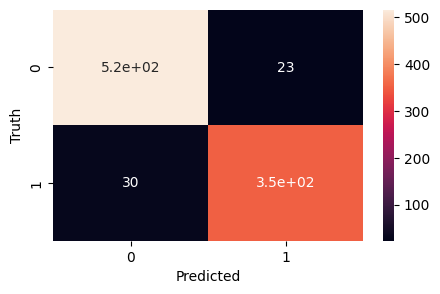

In [84]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')